In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler, MinMaxScaler




file_path = "Employee.csv"
df = pd.read_csv(file_path)



In [36]:
# 1. Data Exploration
#-----------------------------------------------------------------------------------
print("Identifying unique values in each feature and determines their length :-")
for column in df.columns:
    unique_values = df[column].unique()
    print(f"Unique values in {column}: {unique_values}")
    print(f"Length of unique values in {column}: {len(unique_values)}\n")


print("statistical analysis and renaming the columns:-")
print(df.describe())

df.rename(columns={'Place': 'City', 'Gender': 'Is_Female'}, inplace=True)


Identifying unique values in each feature and determines their length :-
Unique values in Company: ['TCS' 'Infosys' 'CTS' nan 'Tata Consultancy Services' 'Congnizant'
 'Infosys Pvt Lmt']
Length of unique values in Company: 7

Unique values in Age: [20. 30. 35. 40. 23. nan 34. 45. 18. 22. 32. 37. 50. 21. 46. 36. 26. 41.
 24. 25. 43. 19. 38. 51. 31. 44. 33. 17.  0. 54.]
Length of unique values in Age: 30

Unique values in Salary: [  nan 2300. 3000. 4000. 5000. 6000. 7000. 8000. 9000. 1089. 1234. 3030.
 3045. 3184. 4824. 5835. 7084. 8943. 8345. 9284. 9876. 2034. 7654. 2934.
 4034. 5034. 8202. 9024. 4345. 6544. 6543. 3234. 4324. 5435. 5555. 8787.
 3454. 5654. 5009. 5098. 3033.]
Length of unique values in Salary: 41

Unique values in Place: ['Chennai' 'Mumbai' 'Calcutta' 'Delhi' 'Podicherry' 'Cochin' nan 'Noida'
 'Hyderabad' 'Bhopal' 'Nagpur' 'Pune']
Length of unique values in Place: 12

Unique values in Country: ['India']
Length of unique values in Country: 1

Unique values in Gender: [0 1

In [38]:
# 2. Data Cleaning
#----------------------------------------------------------
print("\n\nFinding the missing and inappropriate values:-")

print(df.isnull().sum())

df['Age'] = df['Age'].replace(0, float('nan'))
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Salary'] = df['Salary'].fillna(df['Salary'].median())
df['City'] = df['City'].fillna('Unknown')
df['Country'] = df['Country'].fillna('India')



print("removing all duplicate rows :-")
df.drop_duplicates(inplace=True)

print("Identifying and handle outliers:- ")
Q1 = df['Salary'].quantile(0.25)
Q3 = df['Salary'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['Salary'] < (Q1 - 1.5 * IQR)) | (df['Salary'] > (Q3 + 1.5 * IQR))]
print("Outliers in Salary:", outliers)
df['Salary'] = df['Salary'].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR)








Finding the missing and inappropriate values:-
Company       8
Age          18
Salary       24
City         14
Country       0
Is_Female     0
dtype: int64
removing all duplicate rows :-
Identifying and handle outliers:- 
Outliers in Salary: Empty DataFrame
Columns: [Company, Age, Salary, City, Country, Is_Female]
Index: []




Filtering data with age > 40 and salary < 5000 :-
     Company   Age  Salary       City Country  Is_Female
21   Infosys  50.0  3184.0      Delhi   India          0
32   Infosys  45.0  4034.0   Calcutta   India          0
39   Infosys  41.0  3000.0     Mumbai   India          0
50   Infosys  41.0  3000.0    Chennai   India          0
57   Infosys  51.0  3184.0  Hyderabad   India          0
68   Infosys  43.0  4034.0     Mumbai   India          0
75   Infosys  44.0  3000.0     Cochin   India          0
86   Infosys  41.0  3000.0      Delhi   India          0
93   Infosys  54.0  3184.0     Mumbai   India          0
104  Infosys  44.0  4034.0      Delhi   India          0
122  Infosys  44.0  3234.0     Mumbai   India          0
129  Infosys  50.0  3184.0   Calcutta   India          0
138      CTS  44.0  3033.0     Cochin   India          0
140  Infosys  44.0  4034.0  Hyderabad   India          0
145  Infosys  44.0  4034.0      Delhi   India          1

Plot a chart with age and salary:- 

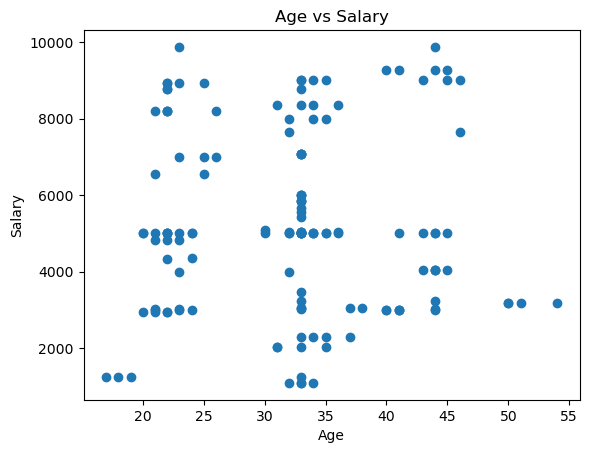


Counting the number of people from each places:- 


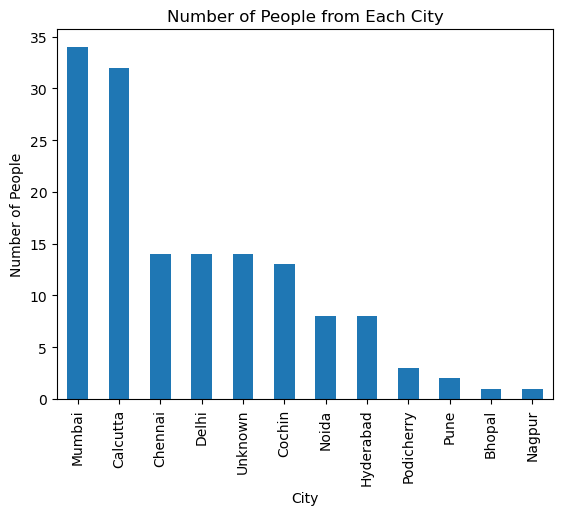

In [40]:
# 3. Data Analysis
#--------------------------------------------------------------
print("\n\nFiltering data with age > 40 and salary < 5000 :-")
filtered_data = df[(df['Age'] > 40) & (df['Salary'] < 5000)]
print(filtered_data)

print("\nPlot a chart with age and salary:- ")
plt.scatter(df['Age'], df['Salary'])
plt.xlabel('Age')
plt.ylabel('Salary')
plt.title('Age vs Salary')
plt.show()

print("\nCounting the number of people from each places:- ")
place_counts = df['City'].value_counts()
place_counts.plot(kind='bar')
plt.xlabel('City')
plt.ylabel('Number of People')
plt.title('Number of People from Each City')
plt.show()



In [46]:
# 4. Data Encoding
# 4. Data Encoding (Score: 2)
print("\n\nEncoding Categorical Variables...")
label_encoder = LabelEncoder()

df['Is_Female'] = label_encoder.fit_transform(df['Is_Female'])
df['Country'] = label_encoder.fit_transform(df['Country'])

# Apply one-hot encoding
categorical_columns = ['Company', 'City']
df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)





Encoding Categorical Variables...


KeyError: "None of [Index(['Company', 'City'], dtype='object')] are in the [columns]"

In [44]:
# 5. Feature Scaling
#-----------------------------------------------------------------------------
print("\n\nPerforming scaling of the features:- ")

print("\nStandard Scaling")
scaler_standard = StandardScaler()
df_scaled_standard = scaler_standard.fit_transform(df[['Age', 'Salary']])

print("\nMin-Max Scaling")
scaler_minmax = MinMaxScaler()
df_scaled_minmax = scaler_minmax.fit_transform(df[['Age', 'Salary']])

df[['Age_Standard', 'Salary_Standard']] = df_scaled_standard
df[['Age_MinMax', 'Salary_MinMax']] = df_scaled_minmax

print(df.head())



Performing scaling of the features:- 

Standard Scaling

Min-Max Scaling
    Age  Salary  Country  Is_Female  Company_Congnizant  Company_Infosys  \
0  20.0  5000.0        0          0               False            False   
1  30.0  5000.0        0          0               False             True   
2  35.0  2300.0        0          0               False            False   
3  40.0  3000.0        0          0               False             True   
4  23.0  4000.0        0          0               False            False   

   Company_Infosys Pvt Lmt  Company_TCS  Company_Tata Consultancy Services  \
0                    False         True                              False   
1                    False        False                              False   
2                    False         True                              False   
3                    False        False                              False   
4                    False         True                              False   
